In [53]:
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

from pyclustertend import hopkins

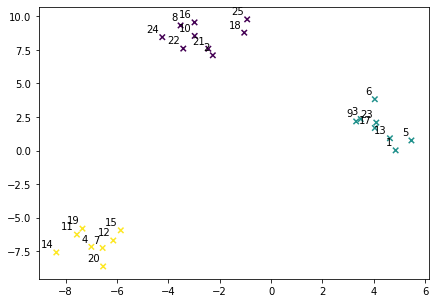

In [3]:
data, clusters = make_blobs(n_samples=25, centers=3, random_state=42)

plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

[]

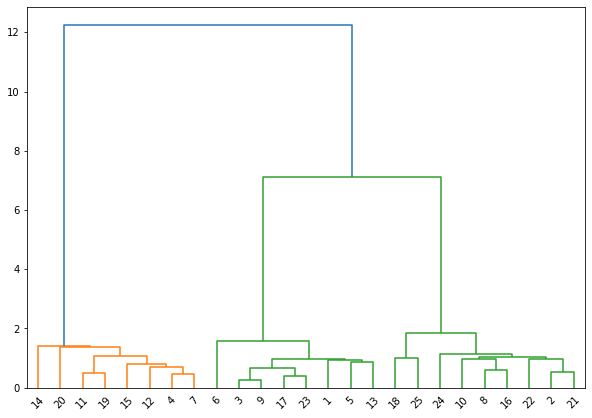

In [4]:
linked = linkage(data, 'single')

labels = list(range(1, 26))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)

plt.plot()

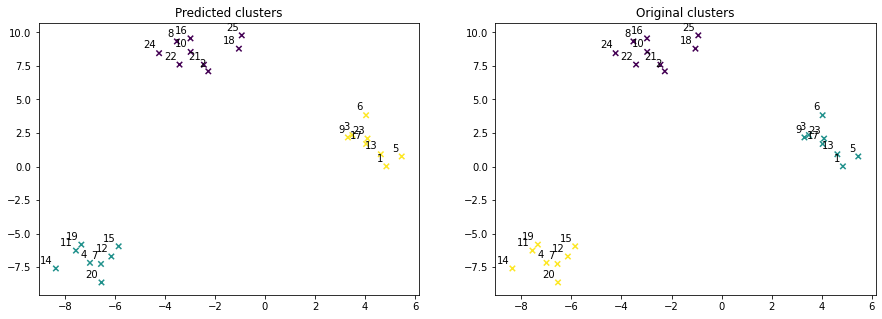

In [18]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
predicted_clusters = cluster.fit_predict(data)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Predicted clusters')
plt.scatter(data[:, 0], data[:, 1], marker='x', c=predicted_clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, predicted_clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.subplot(122)
plt.title('Original clusters')
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

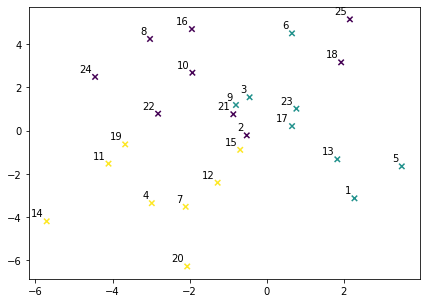

In [21]:
data, clusters = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=2.0, center_box=(-4.0, 4.0))
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

[]

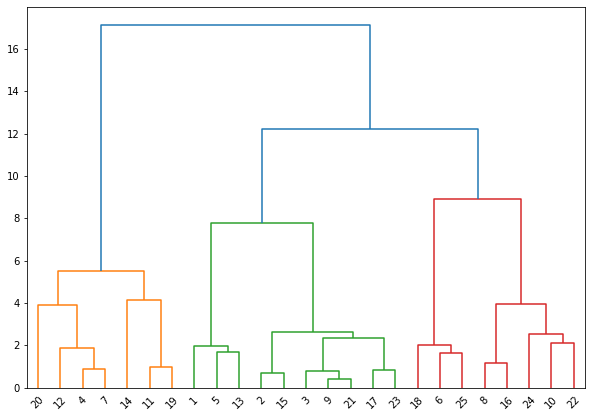

In [23]:
linked = linkage(data, 'ward')

labels = list(range(1, 26))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)

plt.plot()

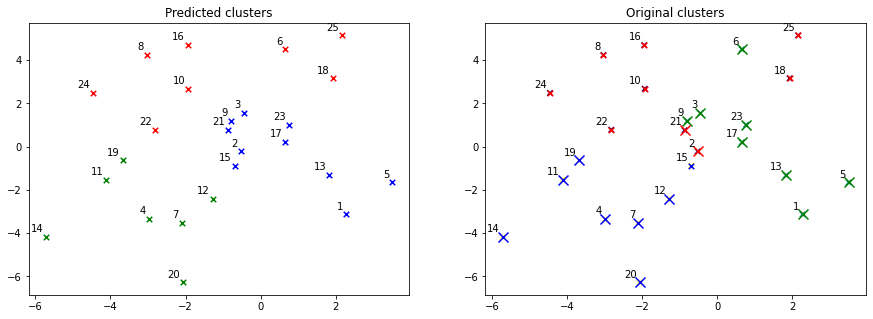

In [30]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
predicted_clusters = cluster.fit_predict(data)

colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Predicted clusters')

for i, (point, cluster) in enumerate(zip(data, predicted_clusters)):
    plt.scatter(point[0], point[1], marker='x', c=colors[cluster], s=30)
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.subplot(122)
plt.title('Original clusters')
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    if cluster == predicted_clusters[i]:
        plt.scatter(point[0], point[1], marker='x', c=colors[cluster], s=30)
    else:
        plt.scatter(point[0], point[1], marker='x', c=colors[cluster], s=100)
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [33]:
clusterable, _ = make_blobs(n_samples=25, centers=3, random_state=42)
somewhat_clusterable, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=2.0, center_box=(-4.0, 4.0))
unclusterable, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=4.0, center_box=(-4.0, 4.0))

print(hopkins(clusterable, 25))
print(hopkins(somewhat_clusterable, 25))
print(hopkins(unclusterable, 25))

0.1745475576961789
0.5960815391307924
0.5684584044921629


In [36]:
bl, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=0.5)

hopkins(bl, 25)

0.08686423646881002

In [51]:
import plotly.graph_objects as go
import numpy as np

In [180]:
pretty_blue = 'rgb(49,130,189)'
label = 'Score'
x_data = np.arange(0.0, 8.1, 0.4)
y_data = []
for std in x_data:
    blobs, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=std)
    hs = hopkins(blobs, 25)
    y_data.append(hs)
y_data = np.array(y_data)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines',
    name=label,
    line=dict(color=pretty_blue, width=4),
    connectgaps=True,
))

# endpoints
fig.add_trace(go.Scatter(
    x=[x_data[0], x_data[-1]],
    y=[y_data[0], y_data[-1]],
    mode='markers',
    marker=dict(color=pretty_blue, size=12)
))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)
annotations = []

# labeling the left_side of the plot
annotations.append(dict(xref='paper', x=0.05, y=y_data[0],
                              xanchor='right', yanchor='middle',
                              text=label + f' {y_data[0] * 100:.0f}%',
                              font=dict(family='Arial',
                                        size=16),
                              showarrow=False))
# labeling the right_side of the plot
annotations.append(dict(xref='paper', x=0.95, y=y_data[-1],
                              xanchor='left', yanchor='middle',
                              text=f'{y_data[-1] * 100:.0f}%',
                              font=dict(family='Arial',
                                        size=16),
                              showarrow=False))

# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text="Score for 1000 100-dimensional samples",
                              font=dict(family='Arial',
                                        size=24,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.8, y=0.67,
                              xanchor='left', yanchor='bottom',
                              text="Uniformity border",
                              font=dict(family='Arial',
                                        size=11,
                                        color='red'),
                              showarrow=False))

fig.add_shape(type="line",
    x0=-0.5, y0=0.25, x1=8.5, y1=0.25,
    line=dict(
        color="red",
        width=1,
        dash="dash"
    )
)

first = 0
for i, hs in enumerate(y_data):
    if hs > 0.25:
        first = i - 1
        break

fig.add_vrect(
    x0=x_data[first], x1=x_data[first + 1],
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
)

fig.update_layout(annotations=annotations)

fig.update_layout(xaxis_title="Inter cluster variance")
fig.show()

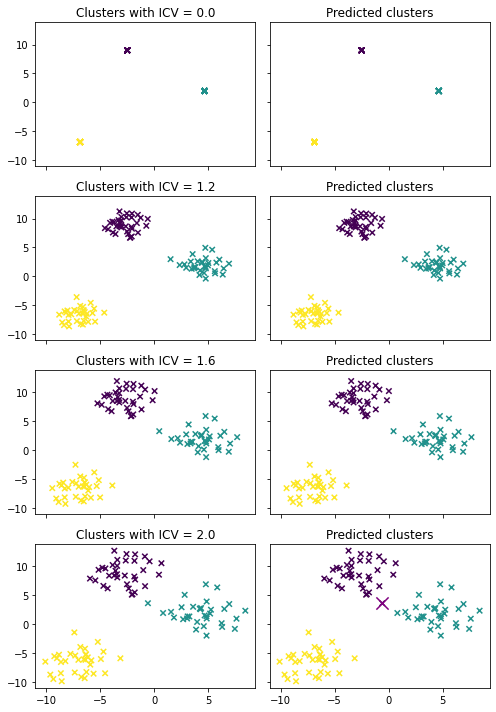

In [155]:
test_stds = [0.0, 1.2, 1.6, 2.0]

fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(7, 10))
for i, std in enumerate(test_stds):
    data, clusters = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=std)
    axes[i][0].scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)
    axes[i][0].set_title(f'Clusters with ICV = {std}')
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
    predicted_clusters = cluster.fit_predict(data)
    predicted_clusters = [1 if c == 2 else 2 if c == 1 else 0 for c in predicted_clusters]
    axes[i][1].scatter(data[:, 0], data[:, 1], marker='x', c=predicted_clusters, s=30)
    axes[i][1].set_title(f'Predicted clusters')
    
    for j, (gold, pred) in enumerate(zip(clusters, predicted_clusters)):
        if gold != pred:
            axes[i][1].scatter(data[j][0], data[j][1], marker='x', c='purple', s=150)

plt.tight_layout()
plt.savefig('misclassification_hopkins_too_large.png')
plt.show()

In [181]:
from yellowbrick.cluster import KElbowVisualizer, KElbow, 

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

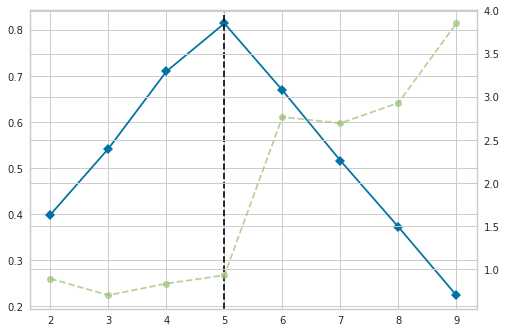

In [227]:
data, clusters = make_blobs(n_samples=1000, n_features=12, centers=5, random_state=42)
model = KMeans()
kelbow = KElbowVisualizer(model, k=(2,10), metric='silhouette')
kelbow.fit(data)

In [220]:
from sklearn.cluster import AffinityPropagation
data, clusters = make_blobs(n_samples=3000, n_features=10000, centers=12, random_state=42, cluster_std=1.5)
clustering = AffinityPropagation(random_state=42, damping=0.9).fit(data)

len(clustering.cluster_centers_)

12

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


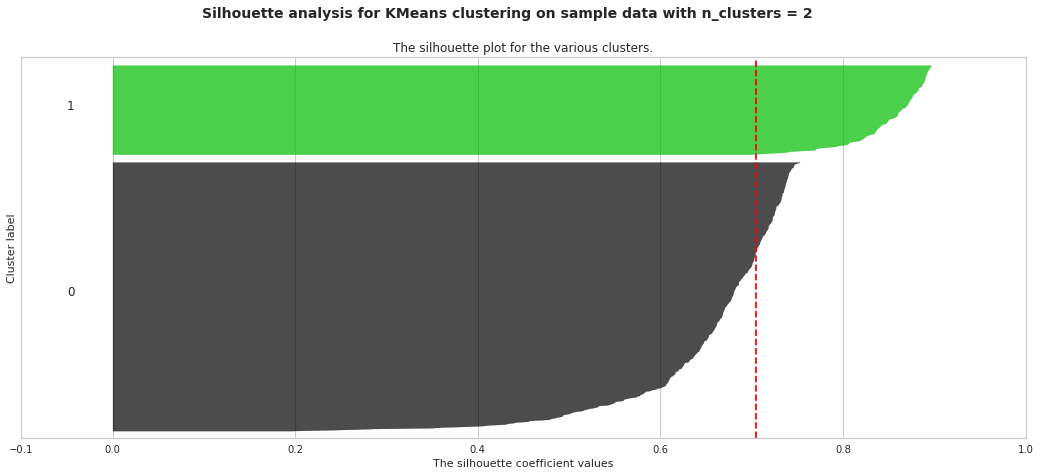

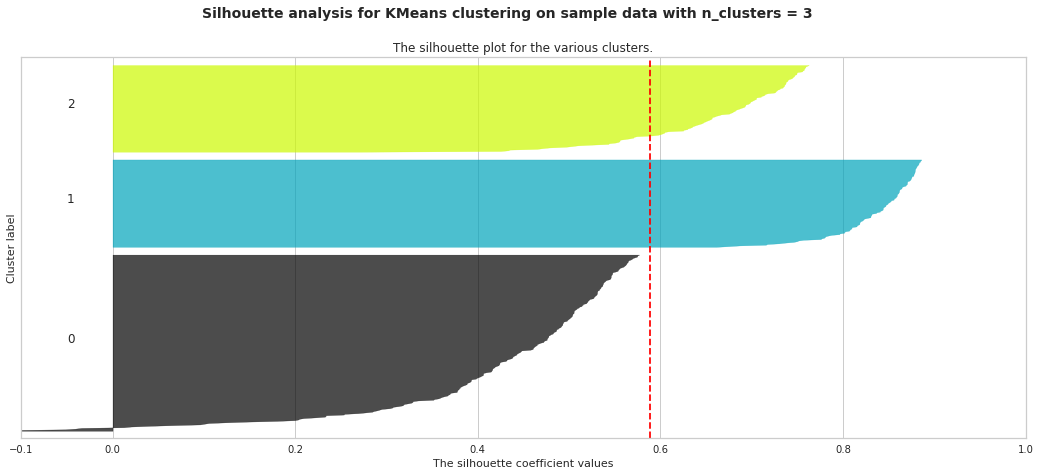

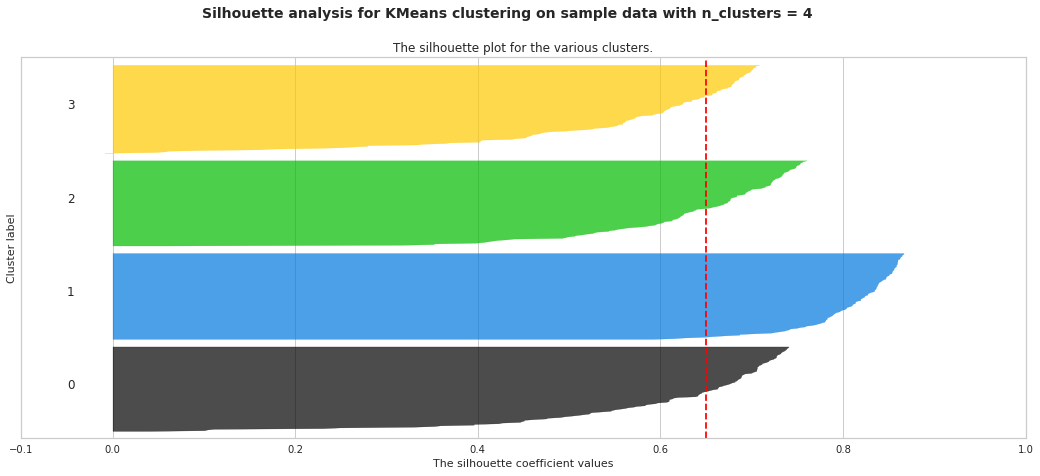

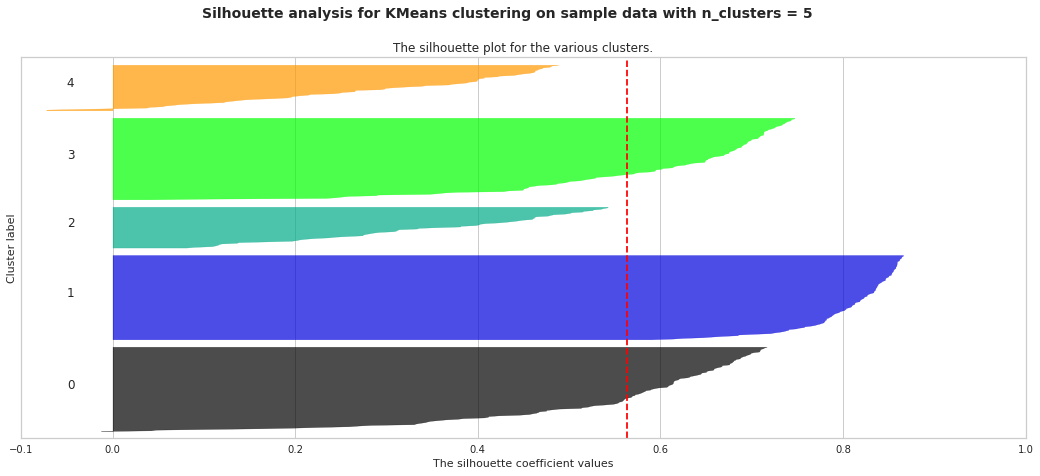

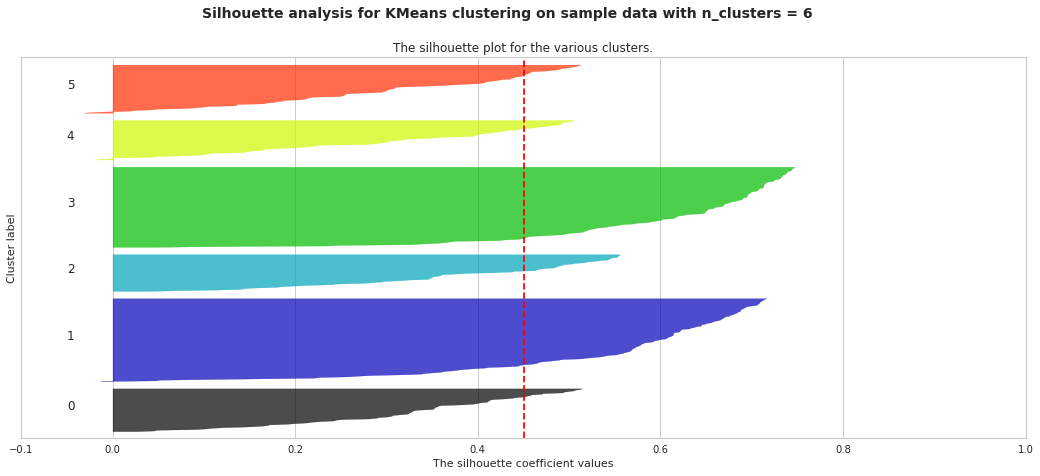

In [226]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = vectors['word2vec_25_100'][np.random.choice(vectors['word2vec_25_100'].shape[0], 10000, replace=False), :]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [260]:
from unidip import UniDip
import unidip.dip as dip
data, clusters = make_blobs(n_samples=1000, centers=3, random_state=42, cluster_std=0.1)

def euclidean(arr, r, c):
    return np.sqrt(np.power(arr[r] - arr[c], 2).sum())

pwise_dist = []
for r in range(len(data) - 1):
    for c in range(r + 1, len(data)):
        pwise_dist.append(euclidean(data, r, c))
pwise_dist = np.msort(np.array(pwise_dist))
print(dip.diptst(pwise_dist))
intervals = UniDip(pwise_dist).run()
print(intervals)

(0.15766650457598633, 0.000999000999000999, (167302, 498116))
[(9482, 166045), (166200, 185883), (185885, 257289), (257292, 277344), (277398, 280607), (280609, 384957), (384959, 386325), (386334, 388272), (388279, 388456), (388458, 394253), (394255, 408615), (408617, 474801)]


In [332]:
from sklearn.decomposition import PCA
data, clusters = make_blobs(n_samples=25, n_features=2, centers=1, random_state=42)

pca = PCA(n_components=1, random_state=42)
pca_reduced = pca.fit_transform(data).flatten()

print(hopkins(data, data.shape[0]))
print(dip.diptst(pca_reduced)[1])

0.5589686013269142
0.6103896103896104


In [363]:
colors = ['rgb(49,130,189)', 'rgb(205,92,92)']
label = ['PCA-Dip', 'Hopkins']
x_data = np.linspace(10, 10000, 18, dtype=np.int16)
hs_data, d_data = [], []
for n in x_data:
    blobs, _ = make_blobs(n_samples=n, centers=1, random_state=42)
    pca_reduced = pca.fit_transform(blobs).flatten()
    hs = hopkins(blobs, n)
    d = dip.diptst(pca_reduced)[1]
    hs_data.append(hs)
    d_data.append(d)
y_data = np.array([d_data, hs_data])

fig = go.Figure()

for i in range(2):
    fig.add_trace(go.Scatter(x=x_data, y=y_data[i], mode='lines',
        name=label[i],
        line=dict(color=colors[i], width=4),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[0], x_data[-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=12)
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)
annotations = []

for y_trace, lab in zip(y_data, label):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=lab + f' {y_trace[0] * 100:.0f}%',
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text=f'{y_trace[-1] * 100:.0f}%',
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))

# Title
annotations.append(dict(xref='paper', yref='paper', x=-0.1, y=1.1,
                              xanchor='left', yanchor='bottom',
                              text="Hopkins vs PCA-Dip pro unimodální 2D data",
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.update_layout(xaxis_title="Počet vzorků")
fig.show()

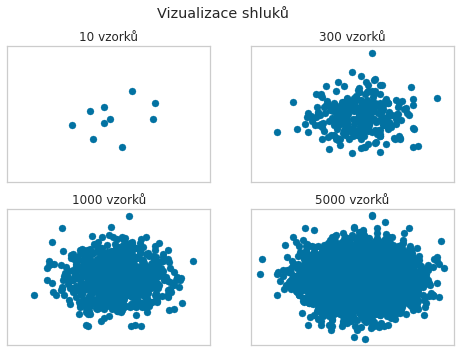

In [360]:
data, clusters = make_blobs(n_samples=10, n_features=2, centers=1, random_state=42)
data1, clusters = make_blobs(n_samples=300, n_features=2, centers=1, random_state=42)
data2, clusters = make_blobs(n_samples=1000, n_features=2, centers=1, random_state=42)
data3, clusters = make_blobs(n_samples=5000, n_features=2, centers=1, random_state=42)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

axes[0][0].scatter(data[:,0], data[:, 1])
axes[0][0].grid(False)
axes[0][0].set_title('10 vzorků')
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])
axes[0][1].scatter(data1[:,0], data1[:, 1])
axes[0][1].grid(False)
axes[0][1].set_title('300 vzorků')
axes[0][1].set_xticks([])
axes[0][1].set_yticks([])
axes[1][0].scatter(data2[:,0], data2[:, 1])
axes[1][0].grid(False)
axes[1][0].set_title('1000 vzorků')
axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
axes[1][1].scatter(data3[:,0], data3[:, 1])
axes[1][1].grid(False)
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])
axes[1][1].set_title('5000 vzorků')

plt.suptitle('Vizualizace shluku')
plt.savefig('clusters_for_hopkins_dip_comp_cz.png')

In [370]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data, clusters = make_blobs(n_samples=1000, n_features=100000, centers=1, random_state=42)

scaler = StandardScaler()
svd = TruncatedSVD(n_components=100, random_state=42)
pca = PCA(n_components=1, random_state=42)
tsne = TSNE(n_components=1, random_state=42)
svd2 = TruncatedSVD(n_components=1, random_state=42)

svd_trans = svd.fit_transform(data)
svd_pca = pca.fit_transform(svd_trans).flatten()
svd_tsne = tsne.fit_transform(svd_trans).flatten()
svd_svd2 = svd2.fit_transform(svd_trans).flatten()

scaled = scaler.fit_transform(data)
sc_svd_trans = svd.fit_transform(scaled)
sc_svd_pca = pca.fit_transform(sc_svd_trans).flatten()
sc_svd_tsne = tsne.fit_transform(sc_svd_trans).flatten()
sc_svd_svd2 = svd2.fit_transform(sc_svd_trans).flatten()

print(dip.diptst(svd_pca)[1])
print(dip.diptst(svd_tsne)[1])
print(dip.diptst(svd_svd2)[1])
print(dip.diptst(sc_svd_pca)[1])
print(dip.diptst(sc_svd_tsne)[1])
print(dip.diptst(sc_svd_svd2)[1])

0.994005994005994
0.999000999000999
0.977022977022977
0.994005994005994
0.938061938061938
0.986013986013986


In [ ]:
from scipy.spatial.distance import pdist

def dip_dist(data):
    dist = np.msort(pdist(data))
    return dip.diptst(dist)[1]

data, clusters = make_blobs(n_samples=1000, n_features=1000000, centers=5, random_state=42)
dip_dist(data)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])